## Support Vector Classifier Implementation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Lets create synthetic data points
from sklearn.datasets import make_classification

In [3]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,
                        n_clusters_per_class=2,n_redundant=0) ## Create synthetic dataset with 2 features and 2 classes

In [4]:
X

array([[-0.69586098,  0.37371782],
       [ 1.00503036, -1.45896426],
       [ 0.60700011, -0.95747578],
       ...,
       [ 0.65958187, -1.48274413],
       [ 0.21564808,  1.56782456],
       [-0.88155656, -0.28481752]])

In [5]:
y

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,

In [6]:
pd.DataFrame(X)[0]

0     -0.695861
1      1.005030
2      0.607000
3      1.150065
4     -0.731834
         ...   
995    1.225487
996    1.135409
997    0.659582
998    0.215648
999   -0.881557
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

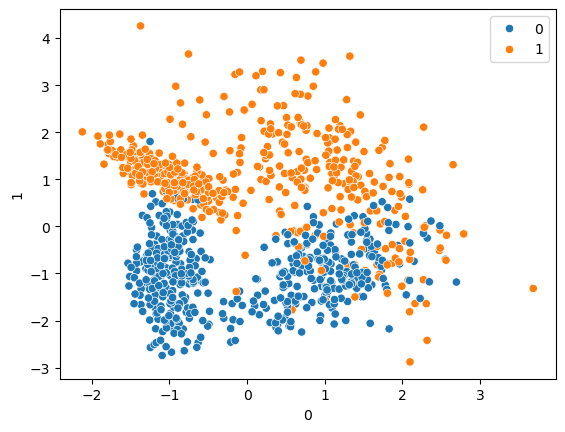

In [7]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y) ## Visualize the data points 

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [9]:
from sklearn.svm import SVC ## Import SVC model from sklearn

In [10]:
svc=SVC(kernel='linear') ## Create SVC model with linear kernel

In [11]:
svc.fit(X_train,y_train) ## Fit the model on training data

SVC(kernel='linear')

In [12]:
svc.coef_ ## Get the coefficients of the hyperplane

array([[0.47735448, 1.91325926]])

In [13]:
## Prediction
y_pred=svc.predict(X_test) 

In [14]:
from sklearn.metrics import classification_report,confusion_matrix ## Import metrics for evaluation

In [15]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       132
           1       0.89      0.93      0.91       118

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[119  13]
 [  8 110]]


In [16]:
rbf=SVC(kernel='rbf') ## Create SVC model with RBF kernel

In [17]:
rbf.fit(X_train,y_train) ## Fit the RBF model on training data

SVC()

In [18]:
## Prediction
y_pred1=rbf.predict(X_test) ## Predict using the RBF model

In [19]:
print(classification_report(y_test,y_pred1)) ## Print classification report for RBF model
print(confusion_matrix(y_test,y_pred1)) ## Print confusion matrix for RBF model

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       132
           1       0.92      0.93      0.92       118

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250

[[122  10]
 [  8 110]]


In [20]:
polynomial=SVC(kernel='poly') ## Create SVC model with polynomial kernel
polynomial.fit(X_train,y_train) ## Fit the polynomial model on training data
## Prediction
y_pred2=polynomial.predict(X_test) ## Predict using the polynomial model
print(classification_report(y_test,y_pred2)) ## Print classification report for polynomial model
print(confusion_matrix(y_test,y_pred2)) ## Print confusion matrix for polynomial model

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       132
           1       0.88      0.94      0.91       118

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

[[117  15]
 [  7 111]]


In [21]:
sigmoid=SVC(kernel='sigmoid') ## Create SVC model with sigmoid kernel
sigmoid.fit(X_train,y_train) ## Fit the sigmoid model on training data
## Prediction
y_pred3=sigmoid.predict(X_test) ## Predict using the sigmoid model
print(classification_report(y_test,y_pred3)) ## Print classification report for sigmoid model
print(confusion_matrix(y_test,y_pred3)) ## Print confusion matrix for sigmoid model

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       132
           1       0.87      0.90      0.88       118

    accuracy                           0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250

[[116  16]
 [ 12 106]]


In [22]:
sigmoid.intercept_ ## Get the intercept of the sigmoid model

array([-0.40603901])

## Hyperparametere Tuning With SVC

In [23]:
from sklearn.model_selection import GridSearchCV ## Import GridSearchCV for hyperparameter tuning
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [24]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3) ## Create GridSearchCV object

In [25]:
grid.fit(X_train,y_train) ## Fit the grid search on training data

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.853 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.867 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [26]:
grid.best_params_ 

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [27]:
## Prediction
y_pred4=grid.predict(X_test)
print(classification_report(y_test,y_pred4)) ## Print classification report for the best model from grid search
print(confusion_matrix(y_test,y_pred4)) ## Print confusion matrix for the best model from grid search

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       132
           1       0.93      0.95      0.94       118

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

[[123   9]
 [  6 112]]
